Get the dataset from Roboflow

In [1]:
import config

from roboflow import Roboflow
rf = Roboflow(api_key=config.api_key)
project = rf.workspace("mikkel-ds").project("football-player-detection-xvszo")
dataset = project.version(6).download("yolov8")

import yaml
with open(f"{dataset.location}/data.yaml") as f:
    doc = yaml.safe_load(f)

    doc['train'] = f"{dataset.location}/train"
    doc['val'] = f"{dataset.location}/valid"

with open(f'{dataset.location}/data.yaml', 'w') as f:
    yaml.safe_dump(doc, f)

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.0.4) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.153, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to Football-Player-Detection-6 in yolov8:: 100%|██████████| 91/91 [00:00<00:00, 3213.35it/s]


Visualize image with bounding boxes

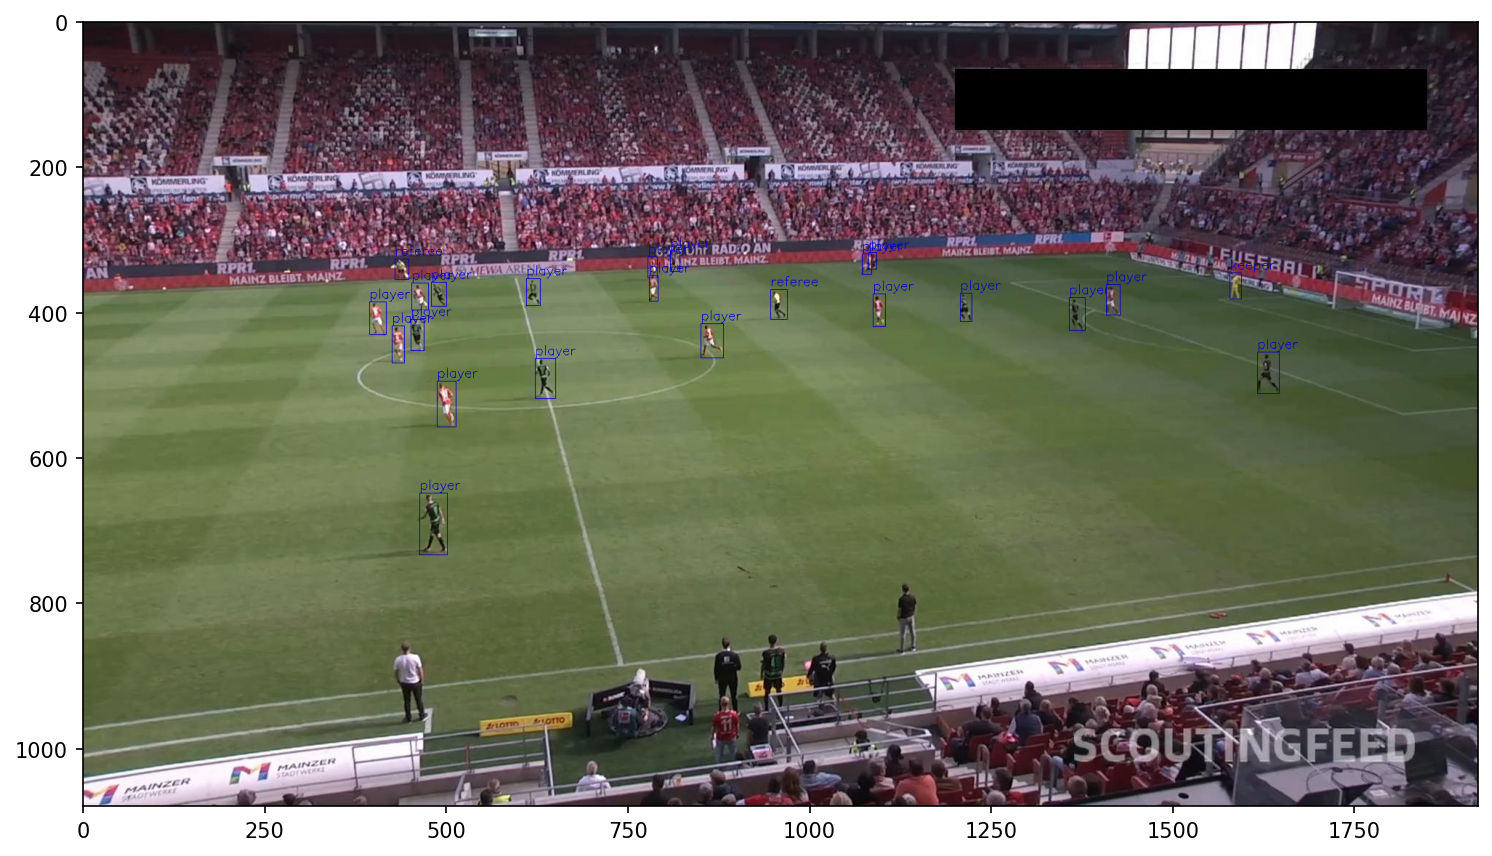

In [2]:
from utils import visualize

image_path = "0b1495d3_0_mp4-0_jpg.rf.ca741cd9d337202959249e6cd18afdad"

visualize(
    im_path=f"{dataset.location}/train/images/{image_path}.jpg", 
    label_path=f"{dataset.location}/train/labels/{image_path}.txt"
)

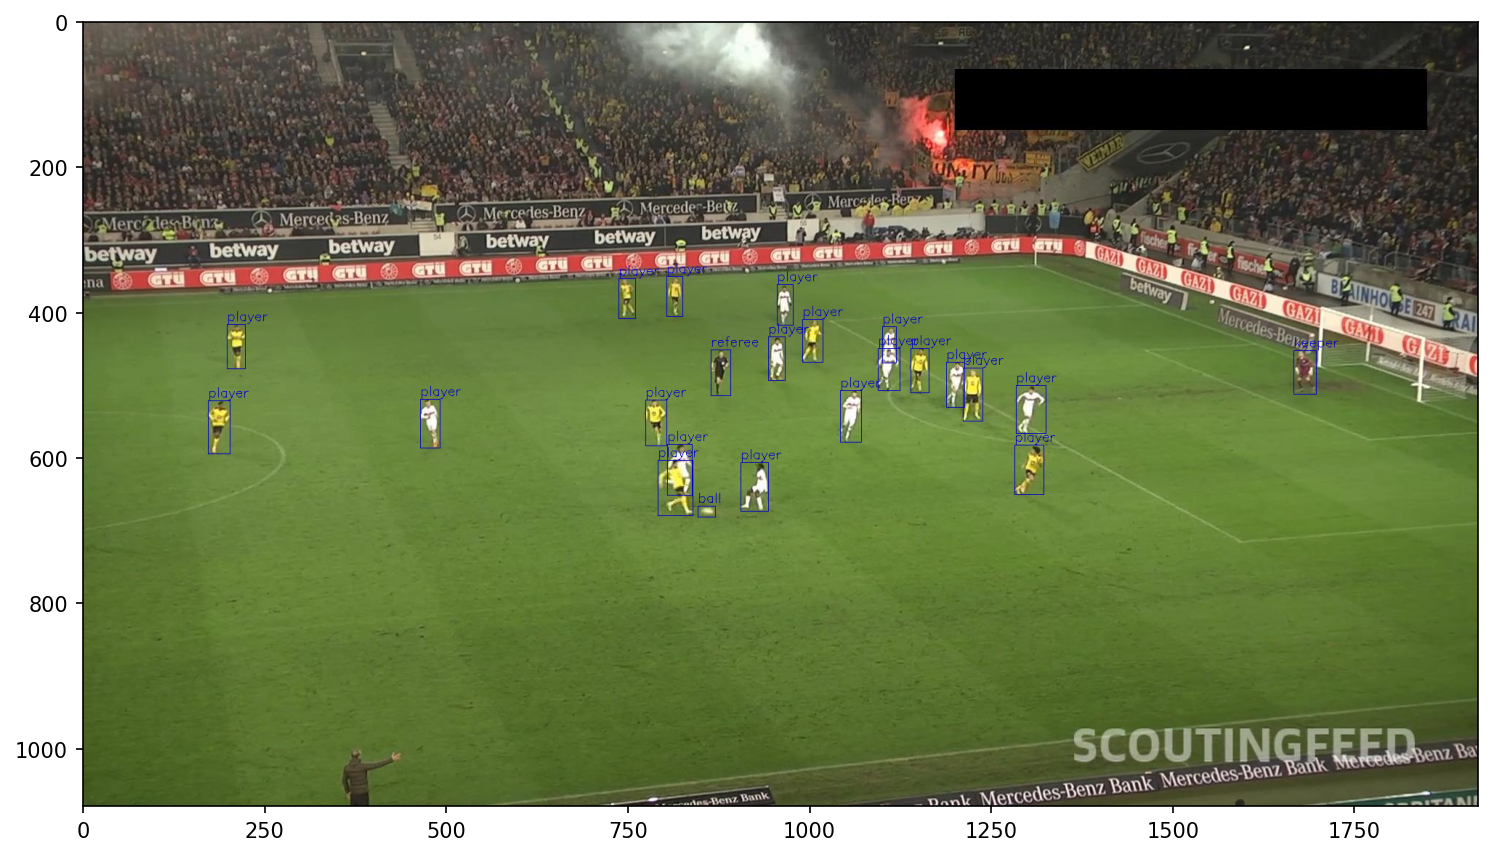

In [3]:
image_path = "0b1495d3_1_mp4-1_jpg.rf.5e2fa19a3dde16a3c164869845aa54f7"

visualize(
    im_path=f"{dataset.location}/train/images/{image_path}.jpg", 
    label_path=f"{dataset.location}/train/labels/{image_path}.txt"
)

In [4]:
# Parameters
epochs = 100
batch_size = 8
imgsz = 640

In [5]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt')
results = model.train(data=f'{dataset.location}/data.yaml', epochs=epochs, batch=batch_size, imgsz=imgsz, verbose=True, name="medium", exist_ok=True)

New https://pypi.org/project/ultralytics/8.0.154 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.153 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060, 12036MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/home/mikkel/VSC/Footbal Players Detection/football-player-detection/Football-Player-Detection-6/data.yaml, epochs=100, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=medium, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid

In [6]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')
results = model.train(data=f'{dataset.location}/data.yaml', epochs=epochs, batch=batch_size, imgsz=imgsz, verbose=True, name="small", exist_ok=True)

New https://pypi.org/project/ultralytics/8.0.154 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.153 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060, 12036MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/mikkel/VSC/Footbal Players Detection/football-player-detection/Football-Player-Detection-6/data.yaml, epochs=100, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=small, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_

In [7]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
results = model.train(data=f'{dataset.location}/data.yaml', epochs=epochs, batch=batch_size, imgsz=imgsz, verbose=True, name="nano", exist_ok=True)

New https://pypi.org/project/ultralytics/8.0.154 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.153 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060, 12036MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/mikkel/VSC/Footbal Players Detection/football-player-detection/Football-Player-Detection-6/data.yaml, epochs=100, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=nano, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_s

Compare Medium, Small, Nano models

In [8]:
model_m = YOLO('runs/detect/medium/weights/best.pt')
metrics = model_m.val()

Ultralytics YOLOv8.0.153 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060, 12036MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients
val: Scanning /home/mikkel/VSC/Footbal Players Detection/football-player-detection/Football-Player-Detection-6/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]
                   all          5        116      0.874      0.657      0.663      0.442
                  ball          5          3          1          0          0          0
                keeper          5          5      0.894          1      0.995      0.716
                player          5         99      0.905      0.848      0.928      0.593
               referee          5          9      0.696      0.778      0.728       0.46
Speed: 0.1ms preprocess, 12.0ms inference

In [9]:
model_s = YOLO('runs/detect/small/weights/best.pt')
metrics = model_s.val()

Ultralytics YOLOv8.0.153 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060, 12036MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients
val: Scanning /home/mikkel/VSC/Footbal Players Detection/football-player-detection/Football-Player-Detection-6/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]
                   all          5        116      0.824      0.571      0.617      0.375
                  ball          5          3          1          0          0          0
                keeper          5          5      0.851          1      0.995      0.585
                player          5         99      0.794      0.838      0.882      0.556
               referee          5          9      0.653      0.444      0.592      0.359
Speed: 0.1ms preprocess, 9.5ms inference,

In [10]:
model_n = YOLO('runs/detect/nano/weights/best.pt')
metrics = model_n.val()

Ultralytics YOLOv8.0.153 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060, 12036MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients
val: Scanning /home/mikkel/VSC/Footbal Players Detection/football-player-detection/Football-Player-Detection-6/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]
                   all          5        116       0.59      0.354      0.349      0.172
                  ball          5          3          1          0          0          0
                keeper          5          5      0.329      0.498      0.426      0.215
                player          5         99      0.718      0.851      0.796       0.42
               referee          5          9      0.311     0.0691      0.174     0.0538
Speed: 0.1ms preprocess, 11.4ms inference,